# Where did people tweet about Covid?

In [ ]:
import pandas as pd
import numpy as np
import json
import sys
import string
import re
from collections import Counter
import altair as alt
import plotly.graph_objects as go
from geopy.geocoders import Nominatim
import plotly.express as px

### If you are in a rush, go directly to the last cell and run it. You'll se the final result anyway (check if the file called mappa.csv is in the same directory as this notebook)

We're going to use only the **general dataset** because the **fake dataset** was to small to get a meaningul chart.

In [ ]:
data = []
with open('dataset/general_result_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

Since not a lot of tweets had the exact location enabled, we've used a geocoding API to get it

In [ ]:
index=0
lati = []
longi = []
texto = []
both = []
counter = []
locator = Nominatim(user_agent="myGeocoder")
for element in data: 
    #print(index)
    if data[index]['place'] is not None:#se c'è coordinates c'è anche place
        location = locator.geocode(data[index]['place']['full_name'])
        if location is not None:
            both.append(str(location.longitude)+" "+str(location.latitude) + " "+location.address.replace(" ","."))
    index=index+1

In [ ]:
c = Counter(both)
df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'address', 0:'count'})
#print(df.to_string())
add = df['address'].to_list()
co = df['count'].to_list()
i = 0
for a in add:
    s = a.split()
    longi.append(s[0])
    lati.append(s[1])
    texto.append(s[2].replace("."," "))
    counter.append(co[i])
    i = i + 1

dfnew = pd.DataFrame(
    {'Long': longi,
     'Lat': lati,
     'Text':texto,
     'Count':counter,
    })

dfnew.to_csv("mappa.csv", index=False) #save it to csv just as a backup

Let's view the map. We've used mapbox for a better visualisation. **You need to save in this directory a file called .mapbox_token in order to see the result. To get the token, register to mapbox.com**

In [ ]:
px.set_mapbox_access_token(open(".mapbox_token").read())

df = pd.read_csv('mappa.csv')
fig = px.scatter_mapbox(df, lat="Lat", lon="Long", color="Count", hover_name='Text',size="Count",size_max=40,
                  color_continuous_scale=px.colors.sequential.Turbo, zoom=0,mapbox_style='light', title="Where did the people tweet about Covid-19 in 2020?")
fig.update_layout(
                width=1000,
                height=750)
fig.show()

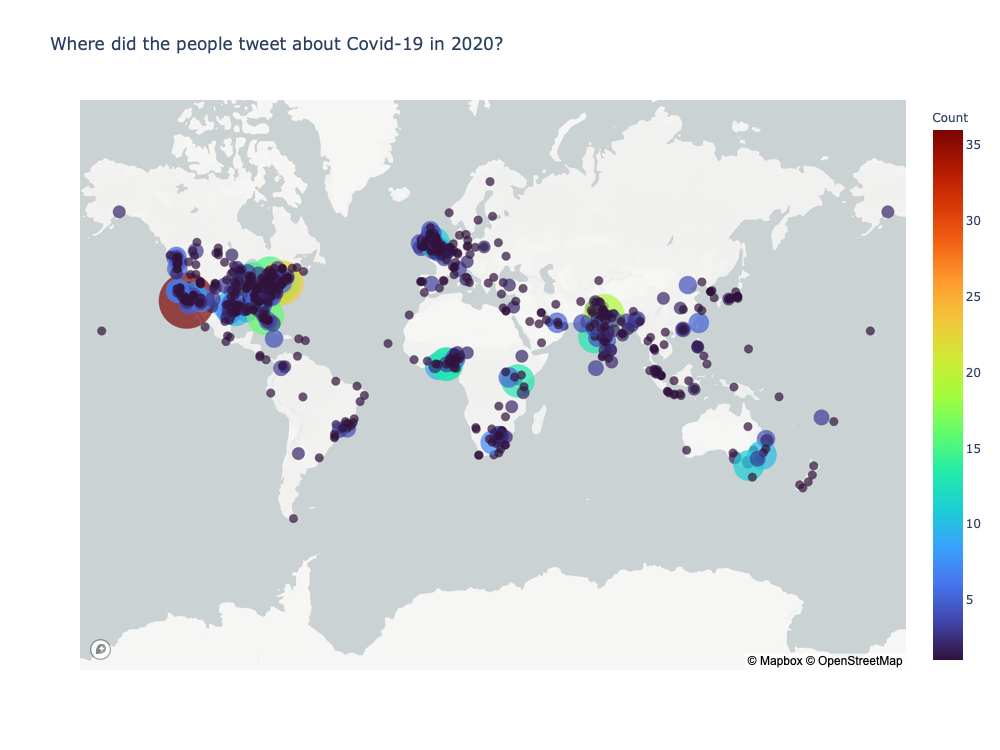

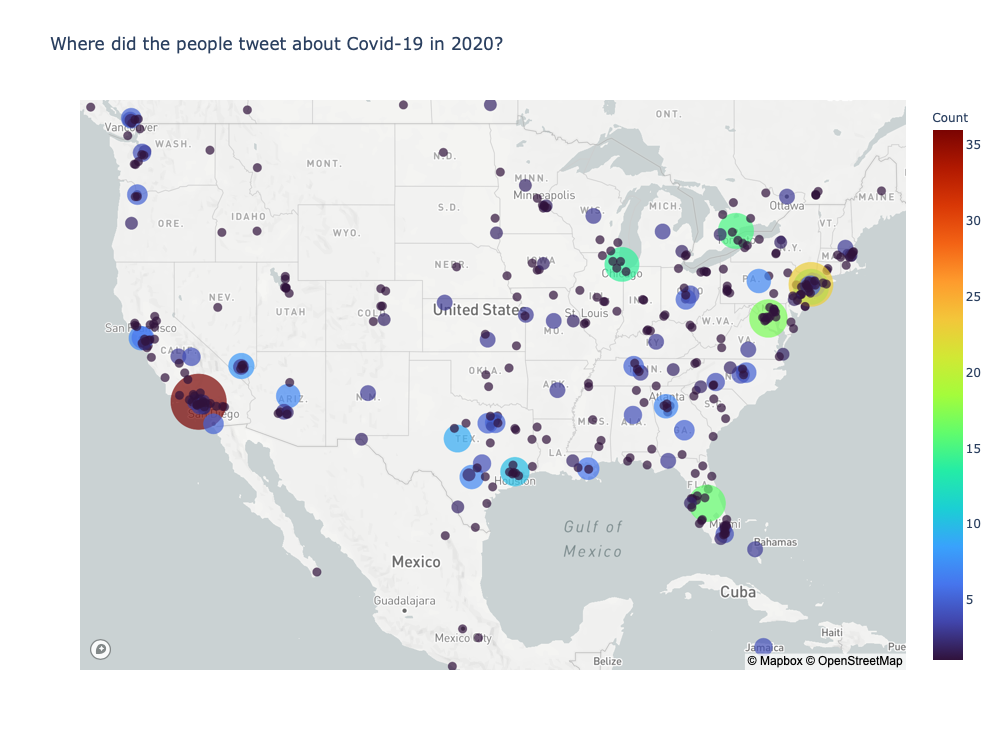

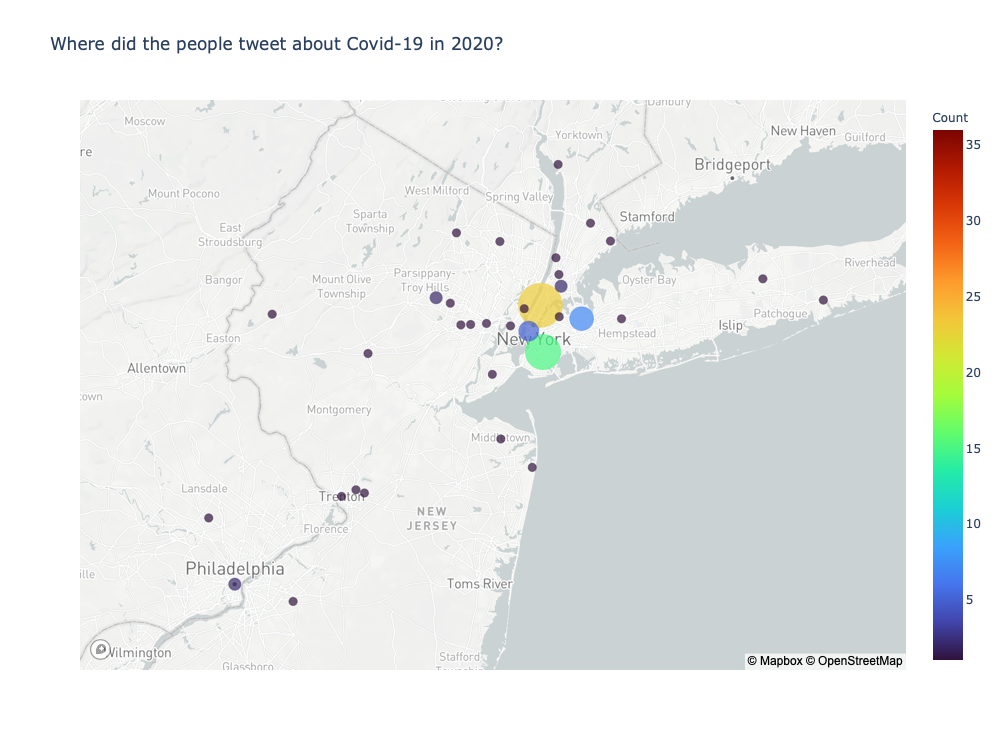